In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error
import pickle

In [4]:
df=pd.read_csv("dataset/babies.csv")
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [6]:
df.describe(
    
)

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [7]:
df.isnull()

,case,bwt,gestation,parity,age,height,weight,smoke
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1231,False,False,False,False,False,False,False,False
1232,False,False,False,False,False,False,False,False
1233,False,False,False,False,False,False,False,False
1234,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

In [13]:
print(df.duplicated().sum())

0


In [15]:
df.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

In [16]:
df.drop(columns=['case'],inplace=True)

In [17]:
df.columns

Index(['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

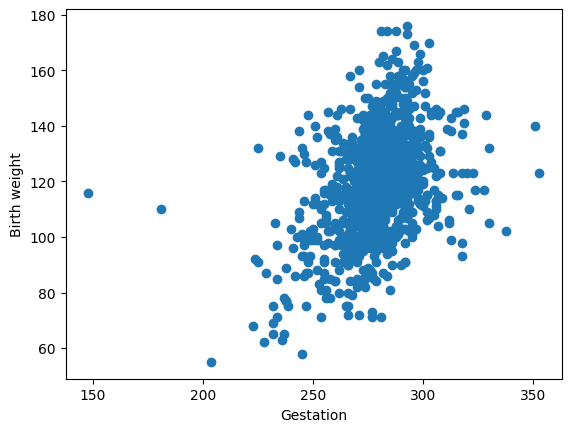

In [18]:
plt.scatter(df['gestation'],df['bwt'])
plt.xlabel("Gestation")
plt.ylabel("Birth weight")
plt.show()

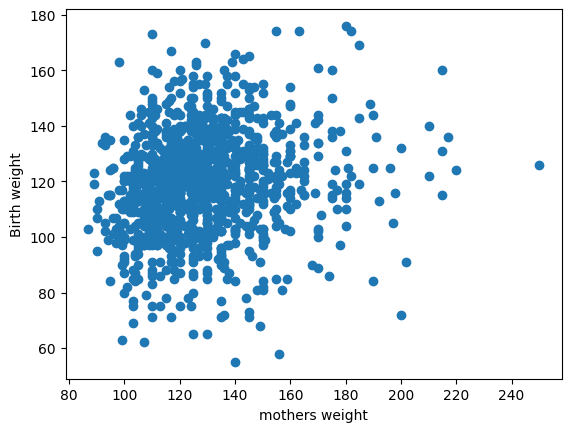

In [19]:
plt.scatter(df['weight'],df['bwt'])
plt.xlabel("mothers weight")
plt.ylabel("Birth weight")
plt.show()

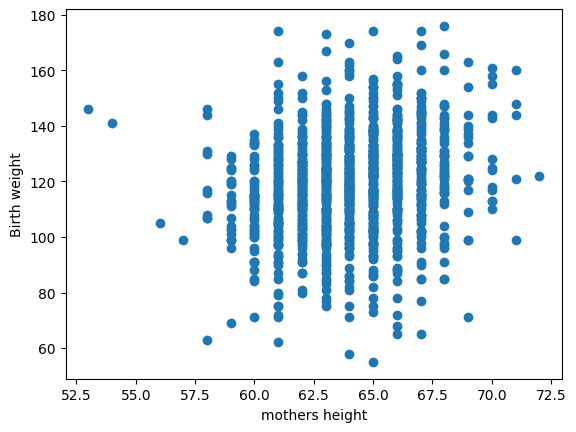

In [20]:
plt.scatter(df['height'],df['bwt'])
plt.xlabel("mothers height")
plt.ylabel("Birth weight")
plt.show()

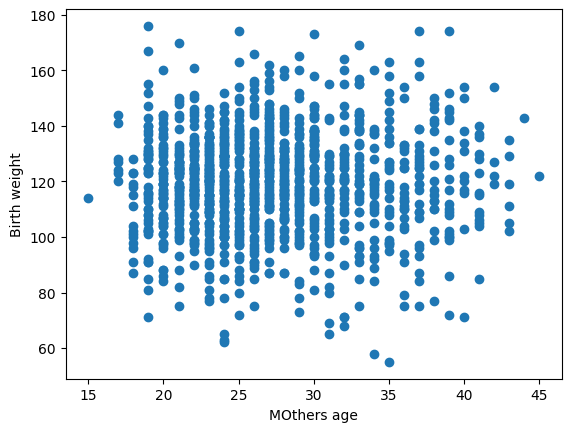

In [21]:
plt.scatter(df['age'],df['bwt'])
plt.xlabel("MOthers age")
plt.ylabel("Birth weight")
plt.show()

In [22]:
df['smoke'].unique()

array([0., 1.])

In [23]:
df['smoke'].value_counts()

smoke
0.0    715
1.0    459
Name: count, dtype: int64

In [24]:
df['smoke'].value_counts(normalize=True)*100

smoke
0.0    60.902896
1.0    39.097104
Name: proportion, dtype: float64

In [25]:
df['parity'].unique()

array([0, 1])

In [26]:
df['parity'].value_counts()

parity
0    866
1    308
Name: count, dtype: int64

In [27]:
df.corr()

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.407543,-0.043908,0.026983,0.203704,0.155923,-0.246800
gestation,0.407543,1.000000,0.080916,-0.053425,0.070470,0.023655,-0.060267
parity,-0.043908,0.080916,1.000000,-0.351041,0.043543,-0.096362,-0.009599
age,0.026983,-0.053425,-0.351041,1.000000,-0.006453,0.147322,-0.067772
height,0.203704,0.070470,0.043543,-0.006453,1.000000,0.435287,0.017507
weight,0.155923,0.023655,-0.096362,0.147322,0.435287,1.000000,-0.060281
smoke,-0.246800,-0.060267,-0.009599,-0.067772,0.017507,-0.060281,1.000000


In [29]:
y=df['bwt']
x=df.iloc[:,1:]

In [31]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20)


In [32]:
x_train.shape

(939, 6)

In [33]:
x_test.shape

(235, 6)

In [47]:
lr=LinearRegression()
lasso=Lasso()
ridge= Ridge()

In [48]:
lr.fit(x_train,y_train)
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [49]:
lr_predict=lr.predict(x_test)
lasso_predict=lasso.predict(x_test)
ridge_predict=ridge.predict(x_test)

In [50]:
lr_r2score= r2_score(y_test,lr_predict)
lasso_r2score= r2_score(y_test,lasso_predict)
ridge_r2score= r2_score(y_test,ridge_predict)

In [51]:
lr_mse= mean_squared_error(y_test,lr_predict)
lasso_mse=mean_squared_error(y_test,lasso_predict)
ridge_mse=mean_squared_error(y_test,ridge_predict)

In [52]:
print ("\nLinearRegression\n")
print("r2_score:",lr_r2score)
print("mean_squared_error:",lr_mse)
print ("\nLasso Regression\n")
print("r2_score:",lasso_r2score)
print("mean_squared_error:",lasso_mse)
print ("\nRidge Regression\n")
print("r2_score:",ridge_r2score)
print("mean_squared_error:",ridge_mse)


LinearRegression

r2_score: 0.2989113001166983
mean_squared_error: 257.5242693999808

Lasso Regression

r2_score: 0.2865008325295716
mean_squared_error: 262.0828888711247

Ridge Regression

r2_score: 0.2989931891577474
mean_squared_error: 257.4941898744207


In [ ]:
with open("model.pkl",'wb') as f:
    pickle.dump(lr,f)

In [ ]:
with open("model.pkl",'rb') as obj:
    mymodel=pickle.load(obj)

In [57]:
x_train.head()

,gestation,parity,age,height,weight,smoke
211,270.0,0,25.0,62.0,150.0,0.0
397,249.0,1,23.0,67.0,134.0,1.0
639,275.0,0,29.0,65.0,145.0,0.0
380,266.0,0,26.0,65.0,125.0,0.0
442,275.0,0,27.0,64.0,111.0,1.0


In [58]:
test_data={
    "gestation":[275.0],
    "parity": [0],
    "age":[27],
    "height":[64.0],
    "weight":[111.0],
    "smoke":[1.0]
}

In [60]:
test_df=pd.DataFrame(test_data)
test_df

,gestation,parity,age,height,weight,smoke
0,275.0,0,27,64.0,111.0,1.0


In [61]:
mymodel.predict(test_df)

array([112.15110509])